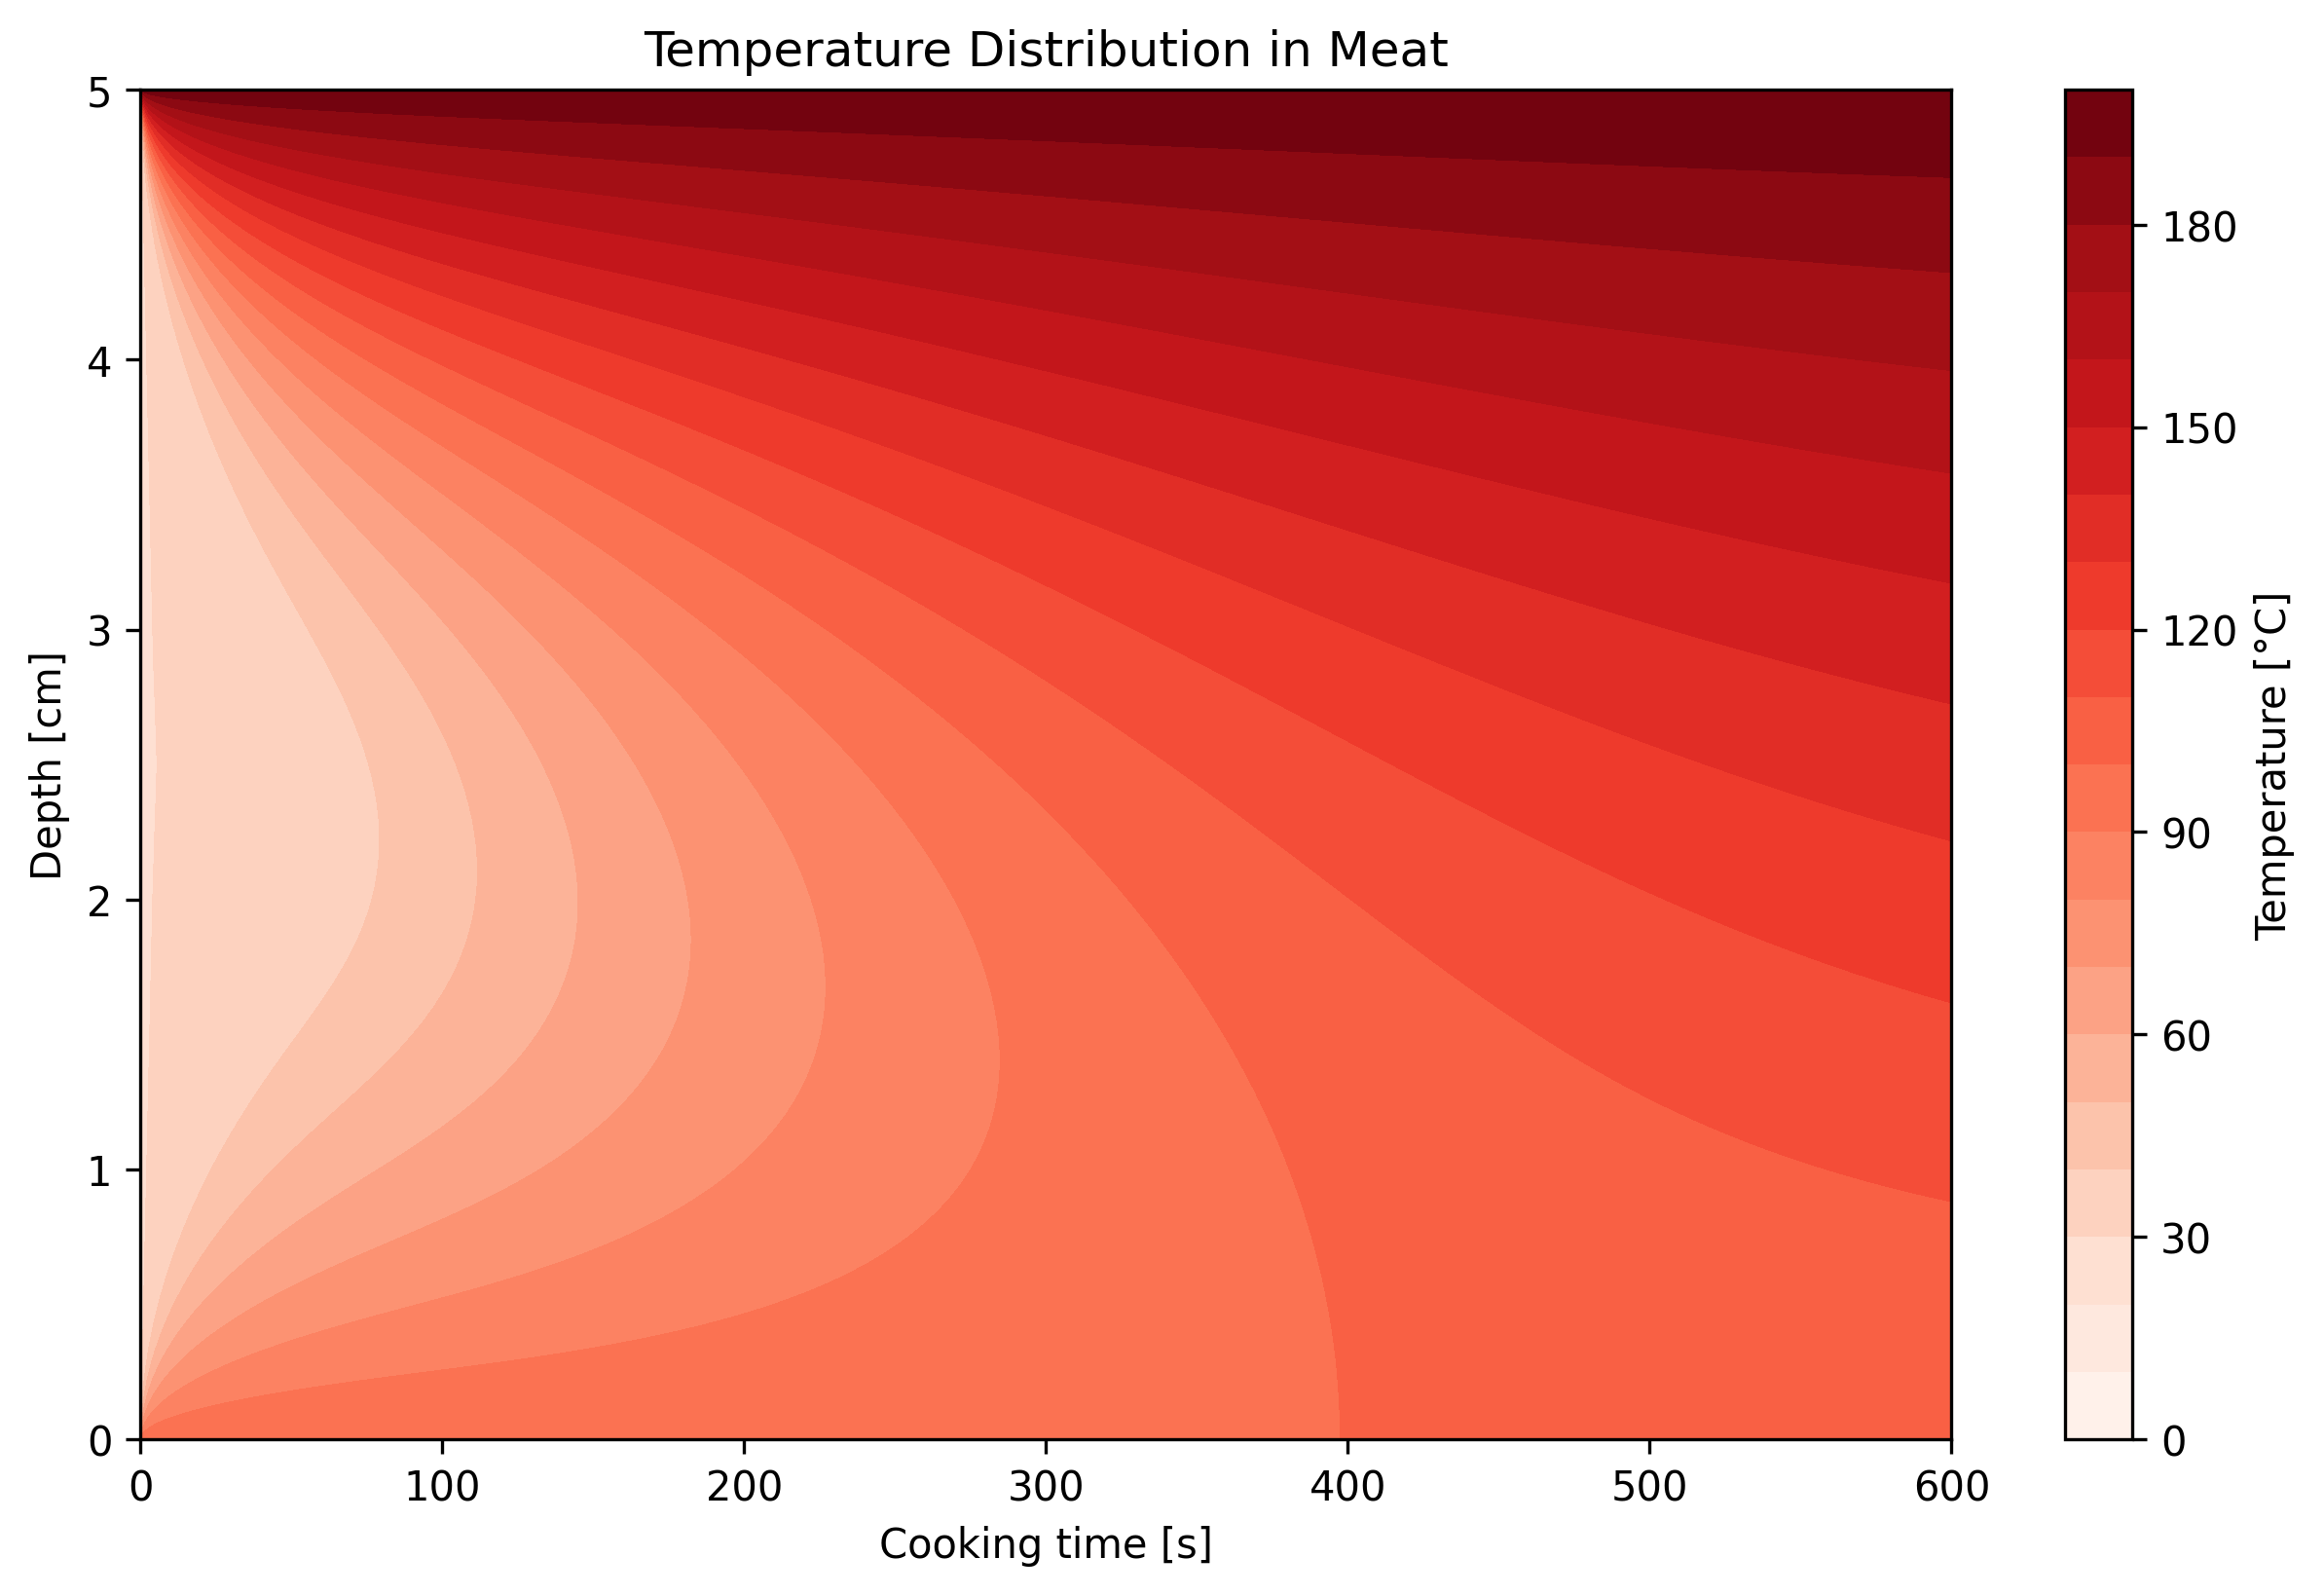

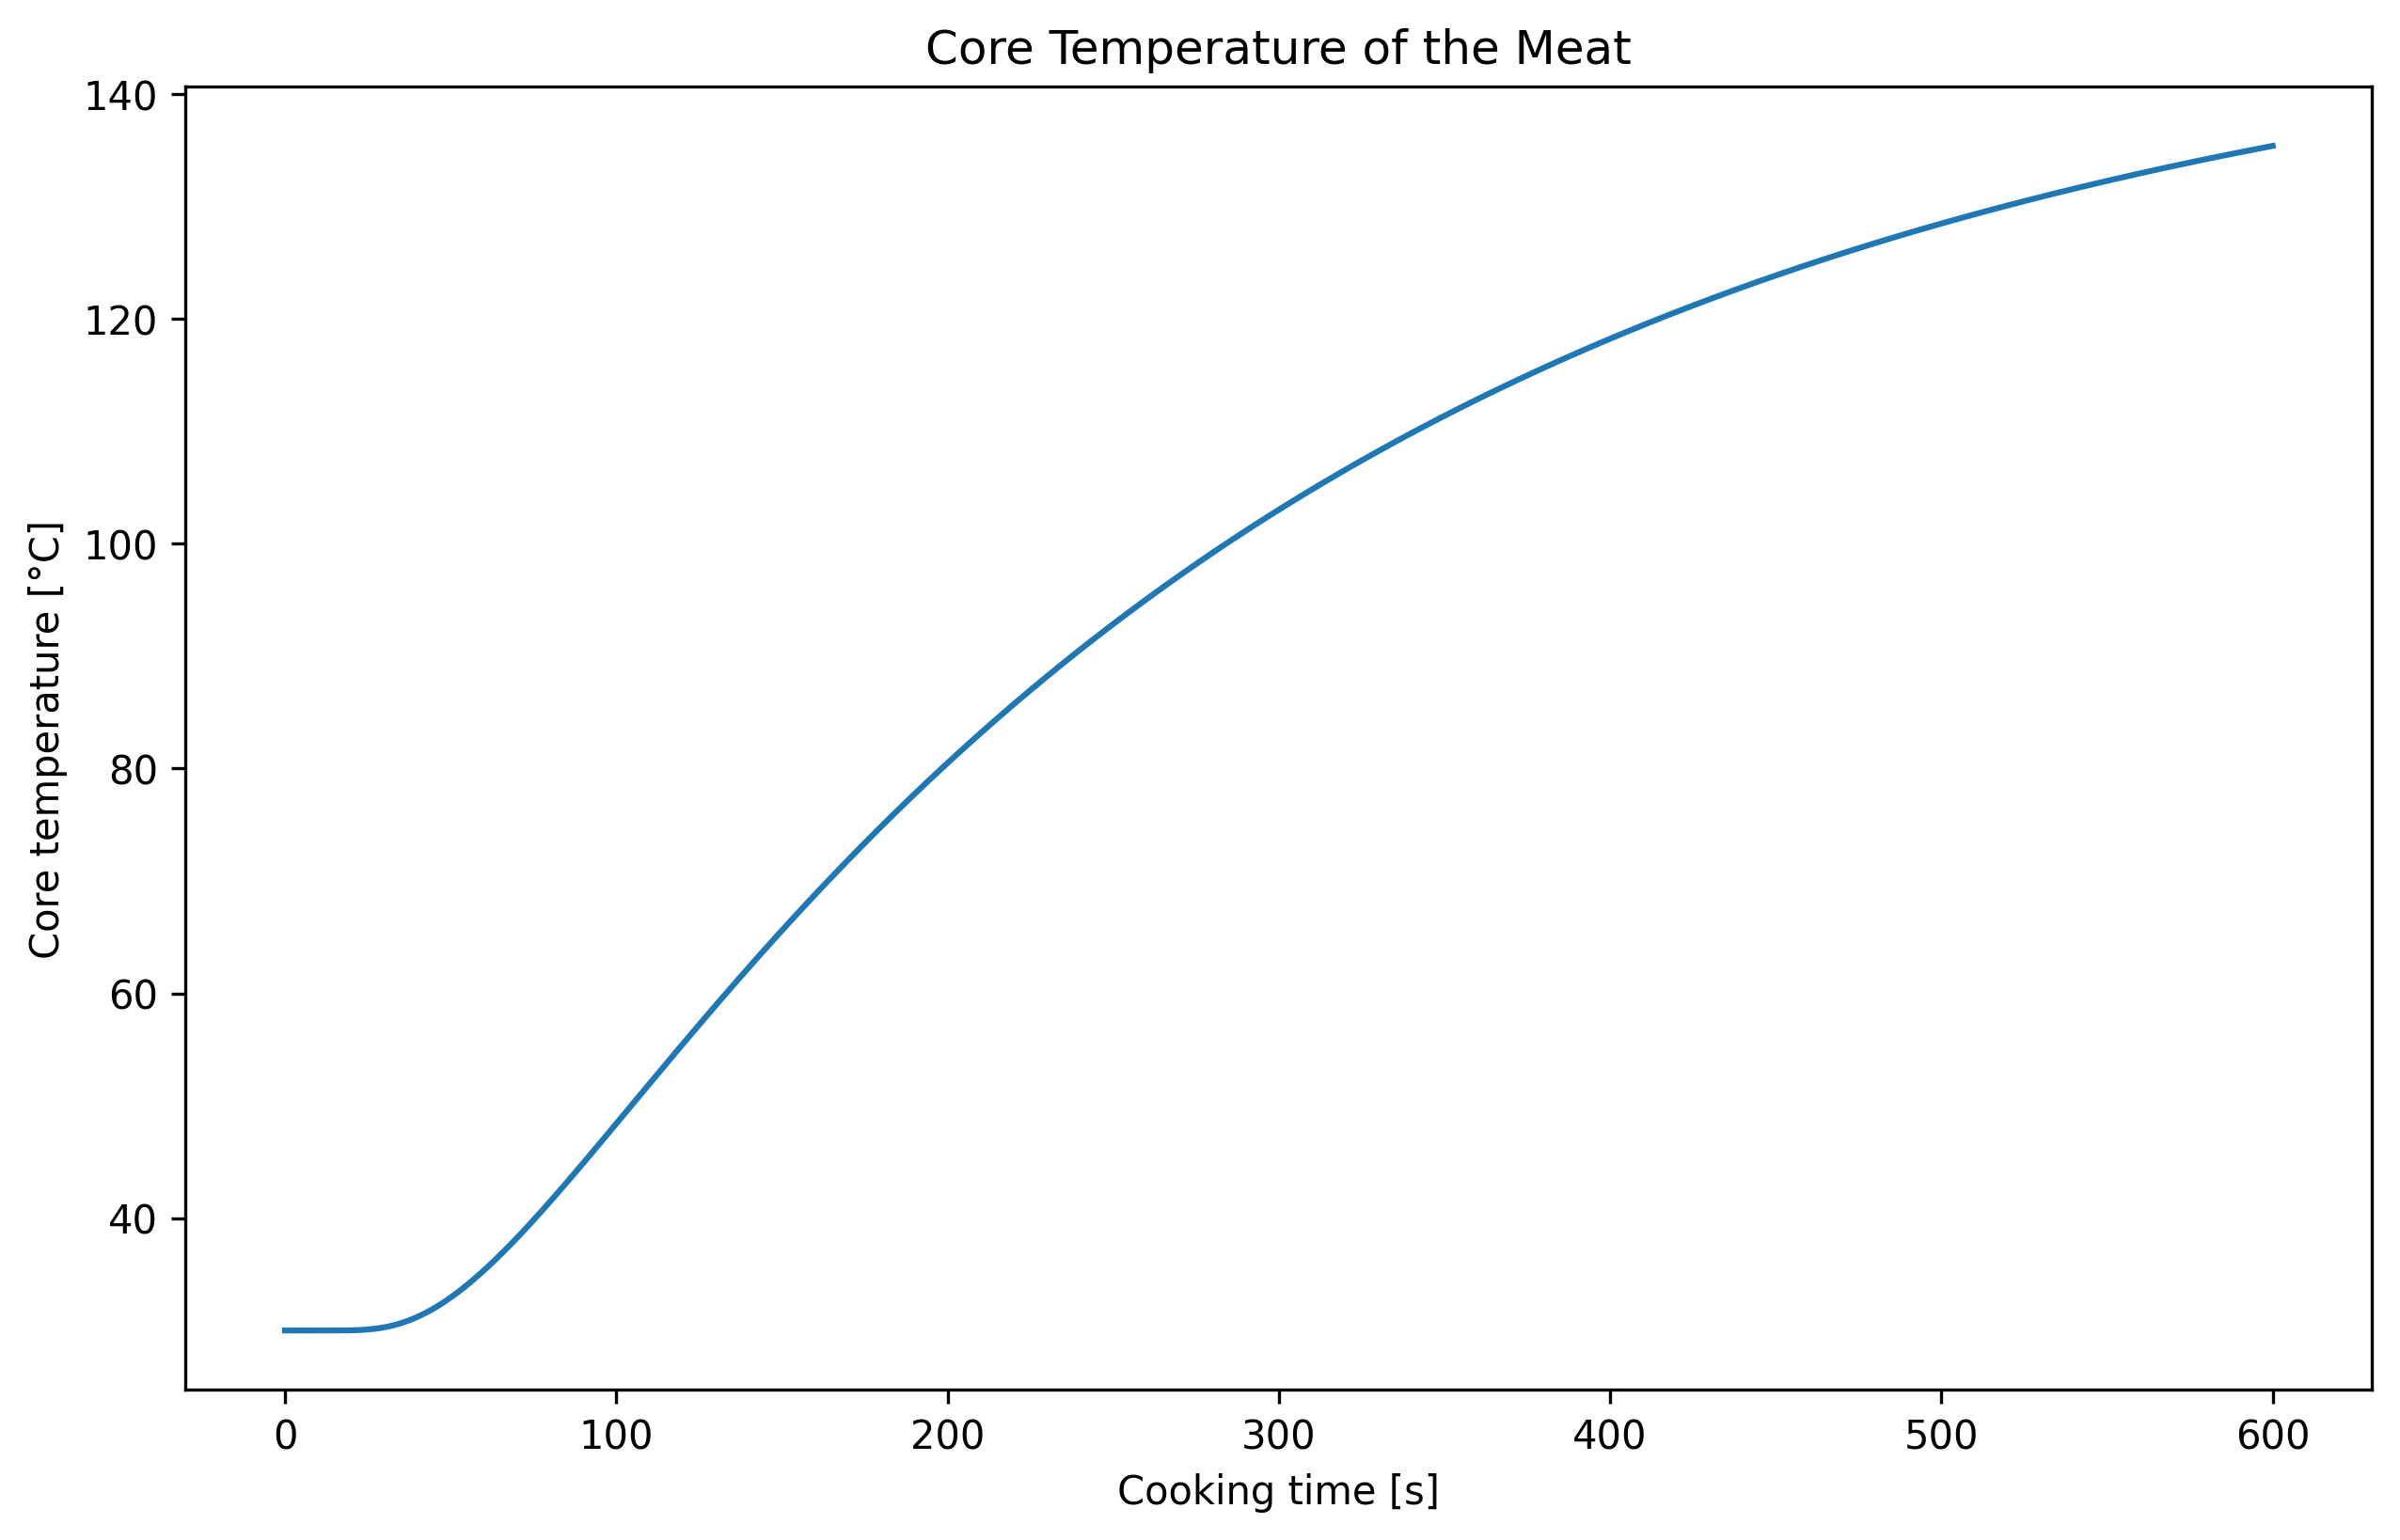

The core temperature of the meat after cooking is: 135.41 °C


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 물성치 및 경계조건 설정
T_plate = 100.0  # 하부 판 온도 [°C]
T_heatelem = 600.0  # 오븐 상부 히팅 파이프 온도 [°C]
T_air = 180.0  # 오븐 내 순환하는 공기 온도 [°C]
T_init = 30.0  # 초기 온도 [°C]
rho = 1.0  # 고기 밀도 [g/cm^3]
C = 0.5  # 고기 비열 [J/g·K]
L = 5.0  # 고기 두께 [cm]
k = 0.005  # 고기 열전도 계수 [W/cm·K]
epsilon = 0.80  # 고기 방사 계수
h_oven = 0.03  # 공기 순환에 의한 대류 열전달 계수 [W/cm^2·K]
sigma = 5.67e-12  # 스테판-볼츠만 계수 [W/cm^2·K^4]

# 공간 및 시간 격자 설정
Nz = 101  # z 방향 격자 수
dz = L / (Nz - 1)  # z 방향 격자 크기 [cm]
t_final = 60*10  # 최종 시간 [s]
dt = 0.1  # 시간 간격 [s]
Nt = int(t_final/dt)  # 시간 스텝 수

# 열확산 계수 계산
alpha = k / (rho * C)
# alpha = 0.01

# 격자 생성 및 초기조건 설정
z = np.linspace(0, L, Nz)
t = np.linspace(0, t_final, Nt)
T = np.zeros([Nz+1, Nt])  # 가상 격자점을 포함한 온도 배열
T[:, 0] = T_init  # 초기 온도 [°C]

# 시간에 따른 반복 계산
for n in range(1, Nt):
    T_old = T[:, n-1]

    # 경계조건 적용
    T[0, n] = T_plate
    T[-2, n] = T_old[-2] + 2 * (dz / k) * (h_oven * (T_air - T_old[-2]) + sigma * epsilon * (T_heatelem**4 - T_old[-2]**4))
    T[-1, n] = T[-2, n]  # 가상 격자점의 온도를 경계 격자점의 온도와 동일하게 설정

    # 내부 격자점에 대한 열전도 방정식 계산
    for i in range(1, Nz-1):
        T[i, n] = T_old[i] + alpha * (dt / dz**2) * (T_old[i+1] - 2*T_old[i] + T_old[i-1])

# 결과 플롯 (가상 격자점을 제외한 온도 분포 사용)
plt.figure(figsize=(10, 6), dpi=300)
plt.contourf(t, z, T[:-1, :], cmap='Reds', levels=np.linspace(0, 200, 21))
plt.xlabel('Cooking time [s]')
plt.ylabel('Depth [cm]')
plt.colorbar(label='Temperature [°C]')
plt.title('Temperature Distribution in Meat')
plt.show()

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t, T[Nz//2, :])
plt.xlabel('Cooking time [s]')
plt.ylabel('Core temperature [°C]')
plt.title('Core Temperature of the Meat')
plt.show()

print(f"The core temperature of the meat after cooking is: {T[Nz//2, -1]:.2f} °C")

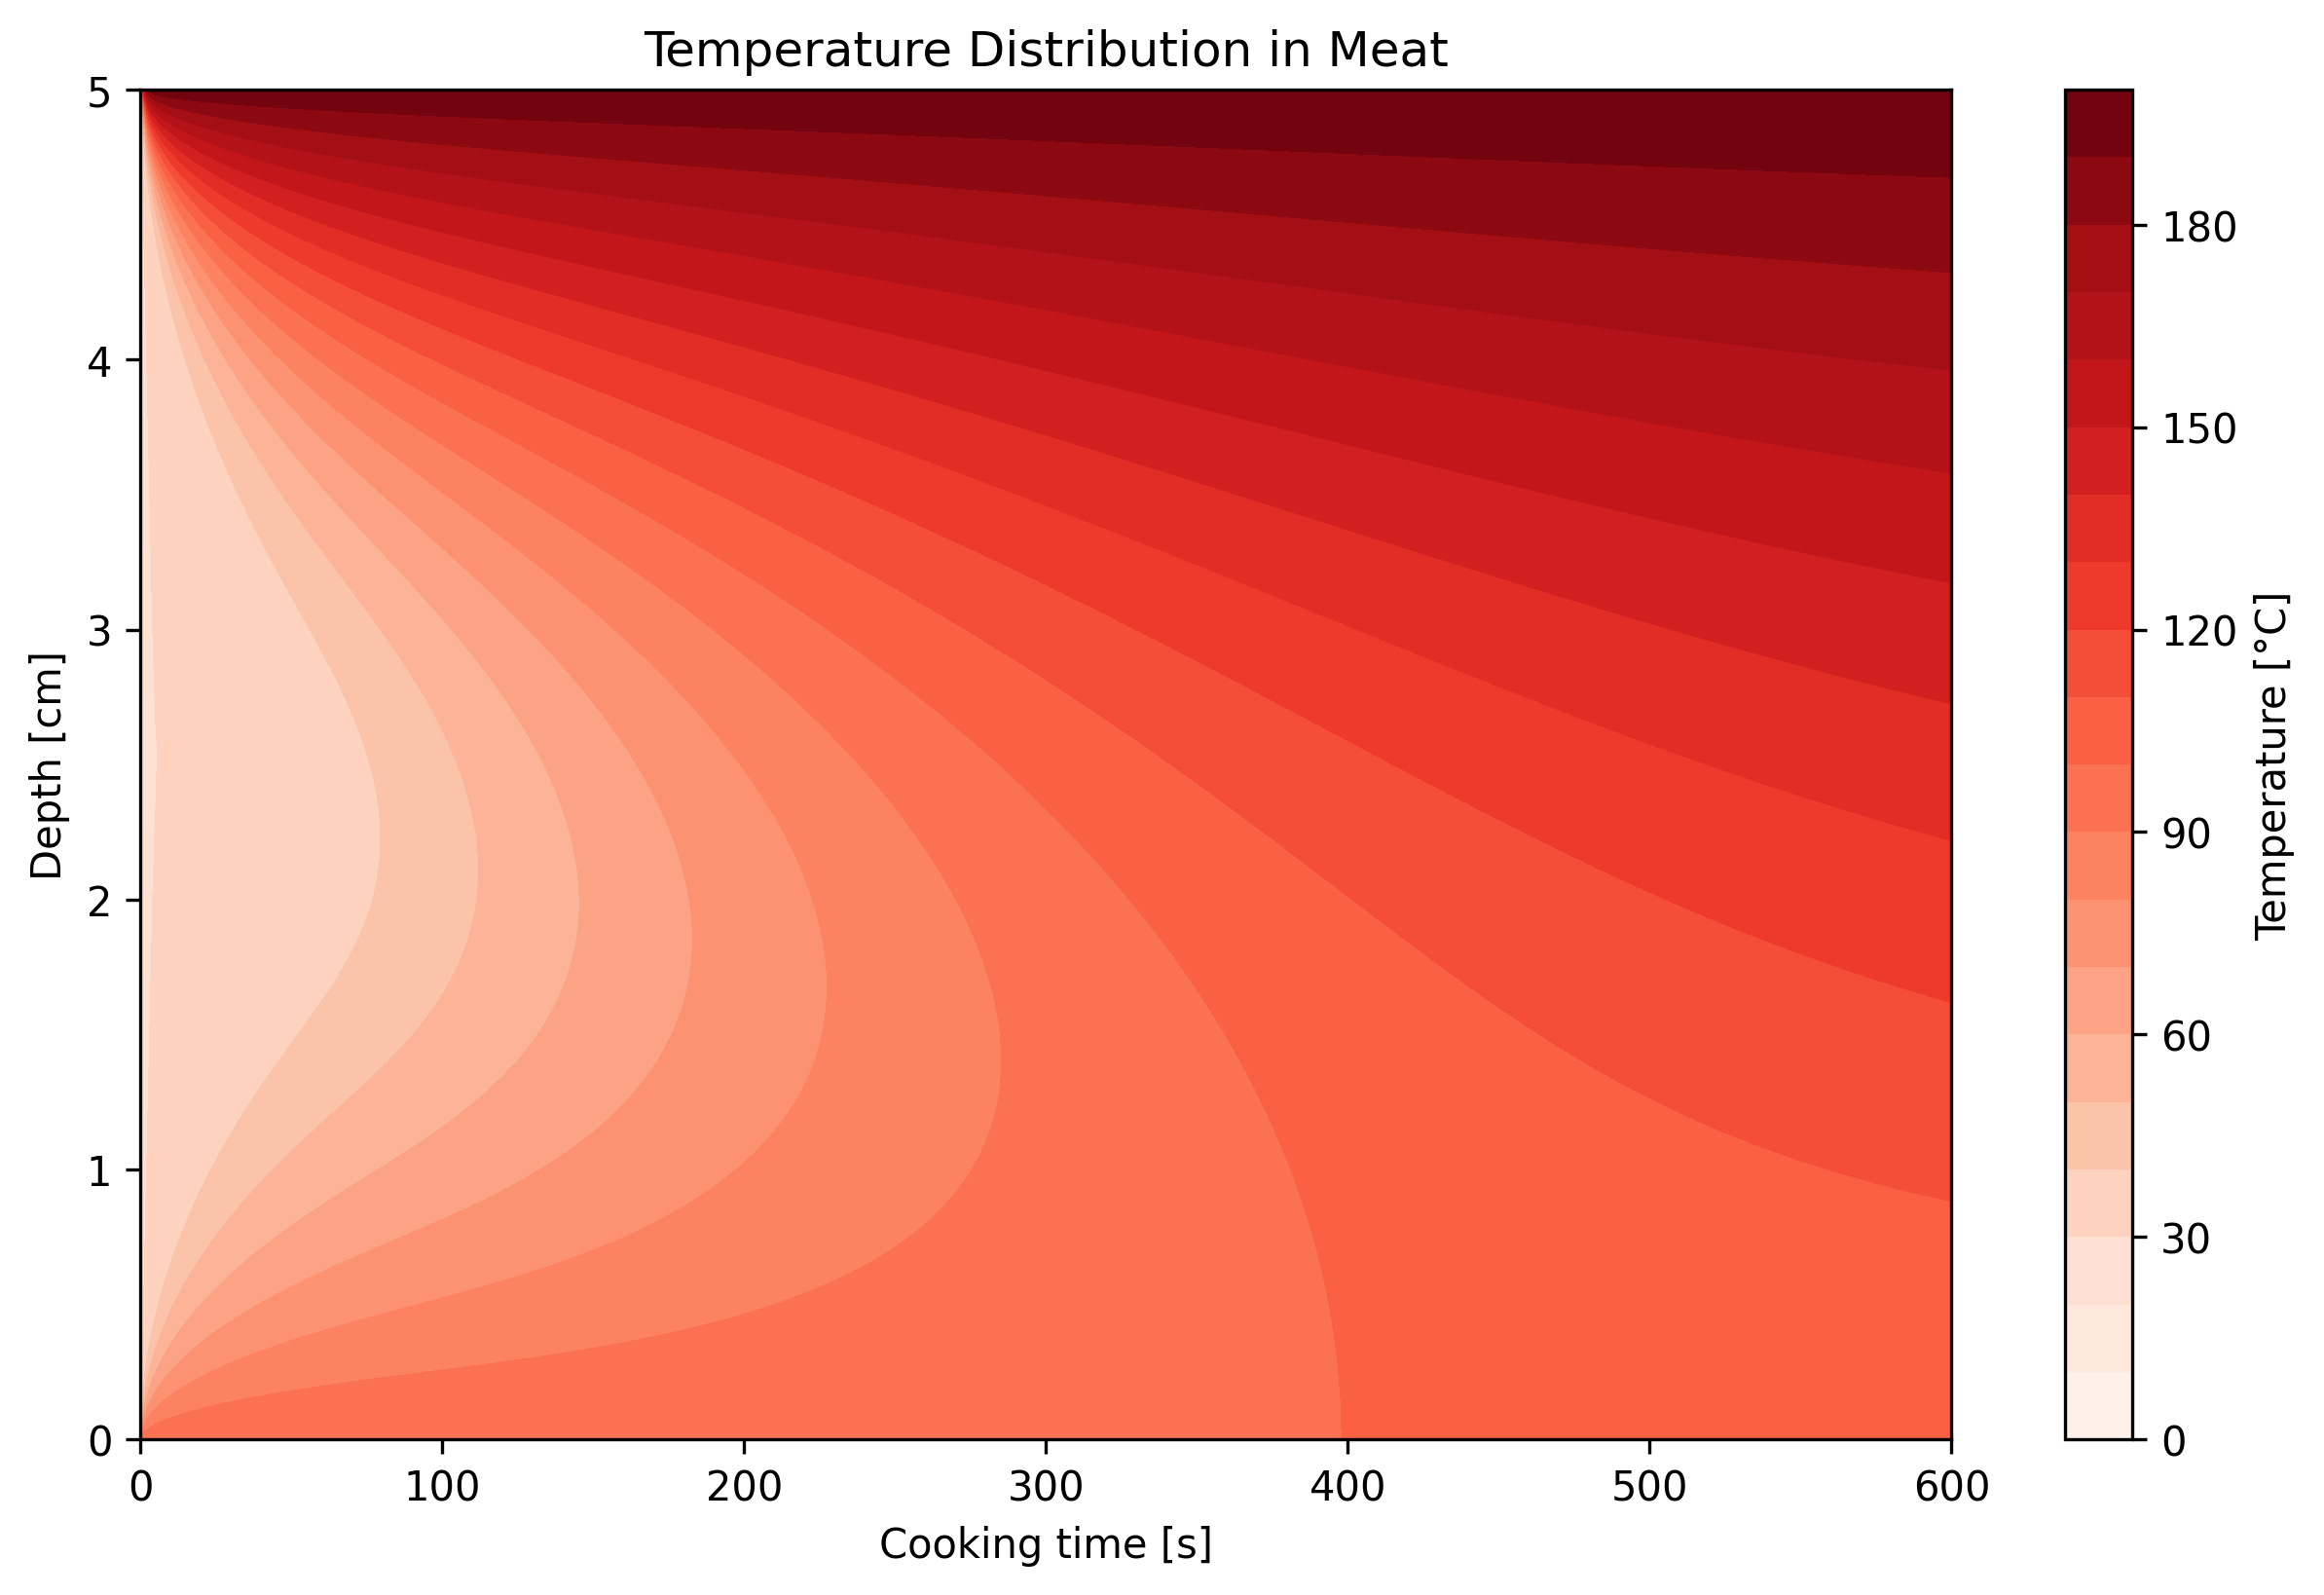

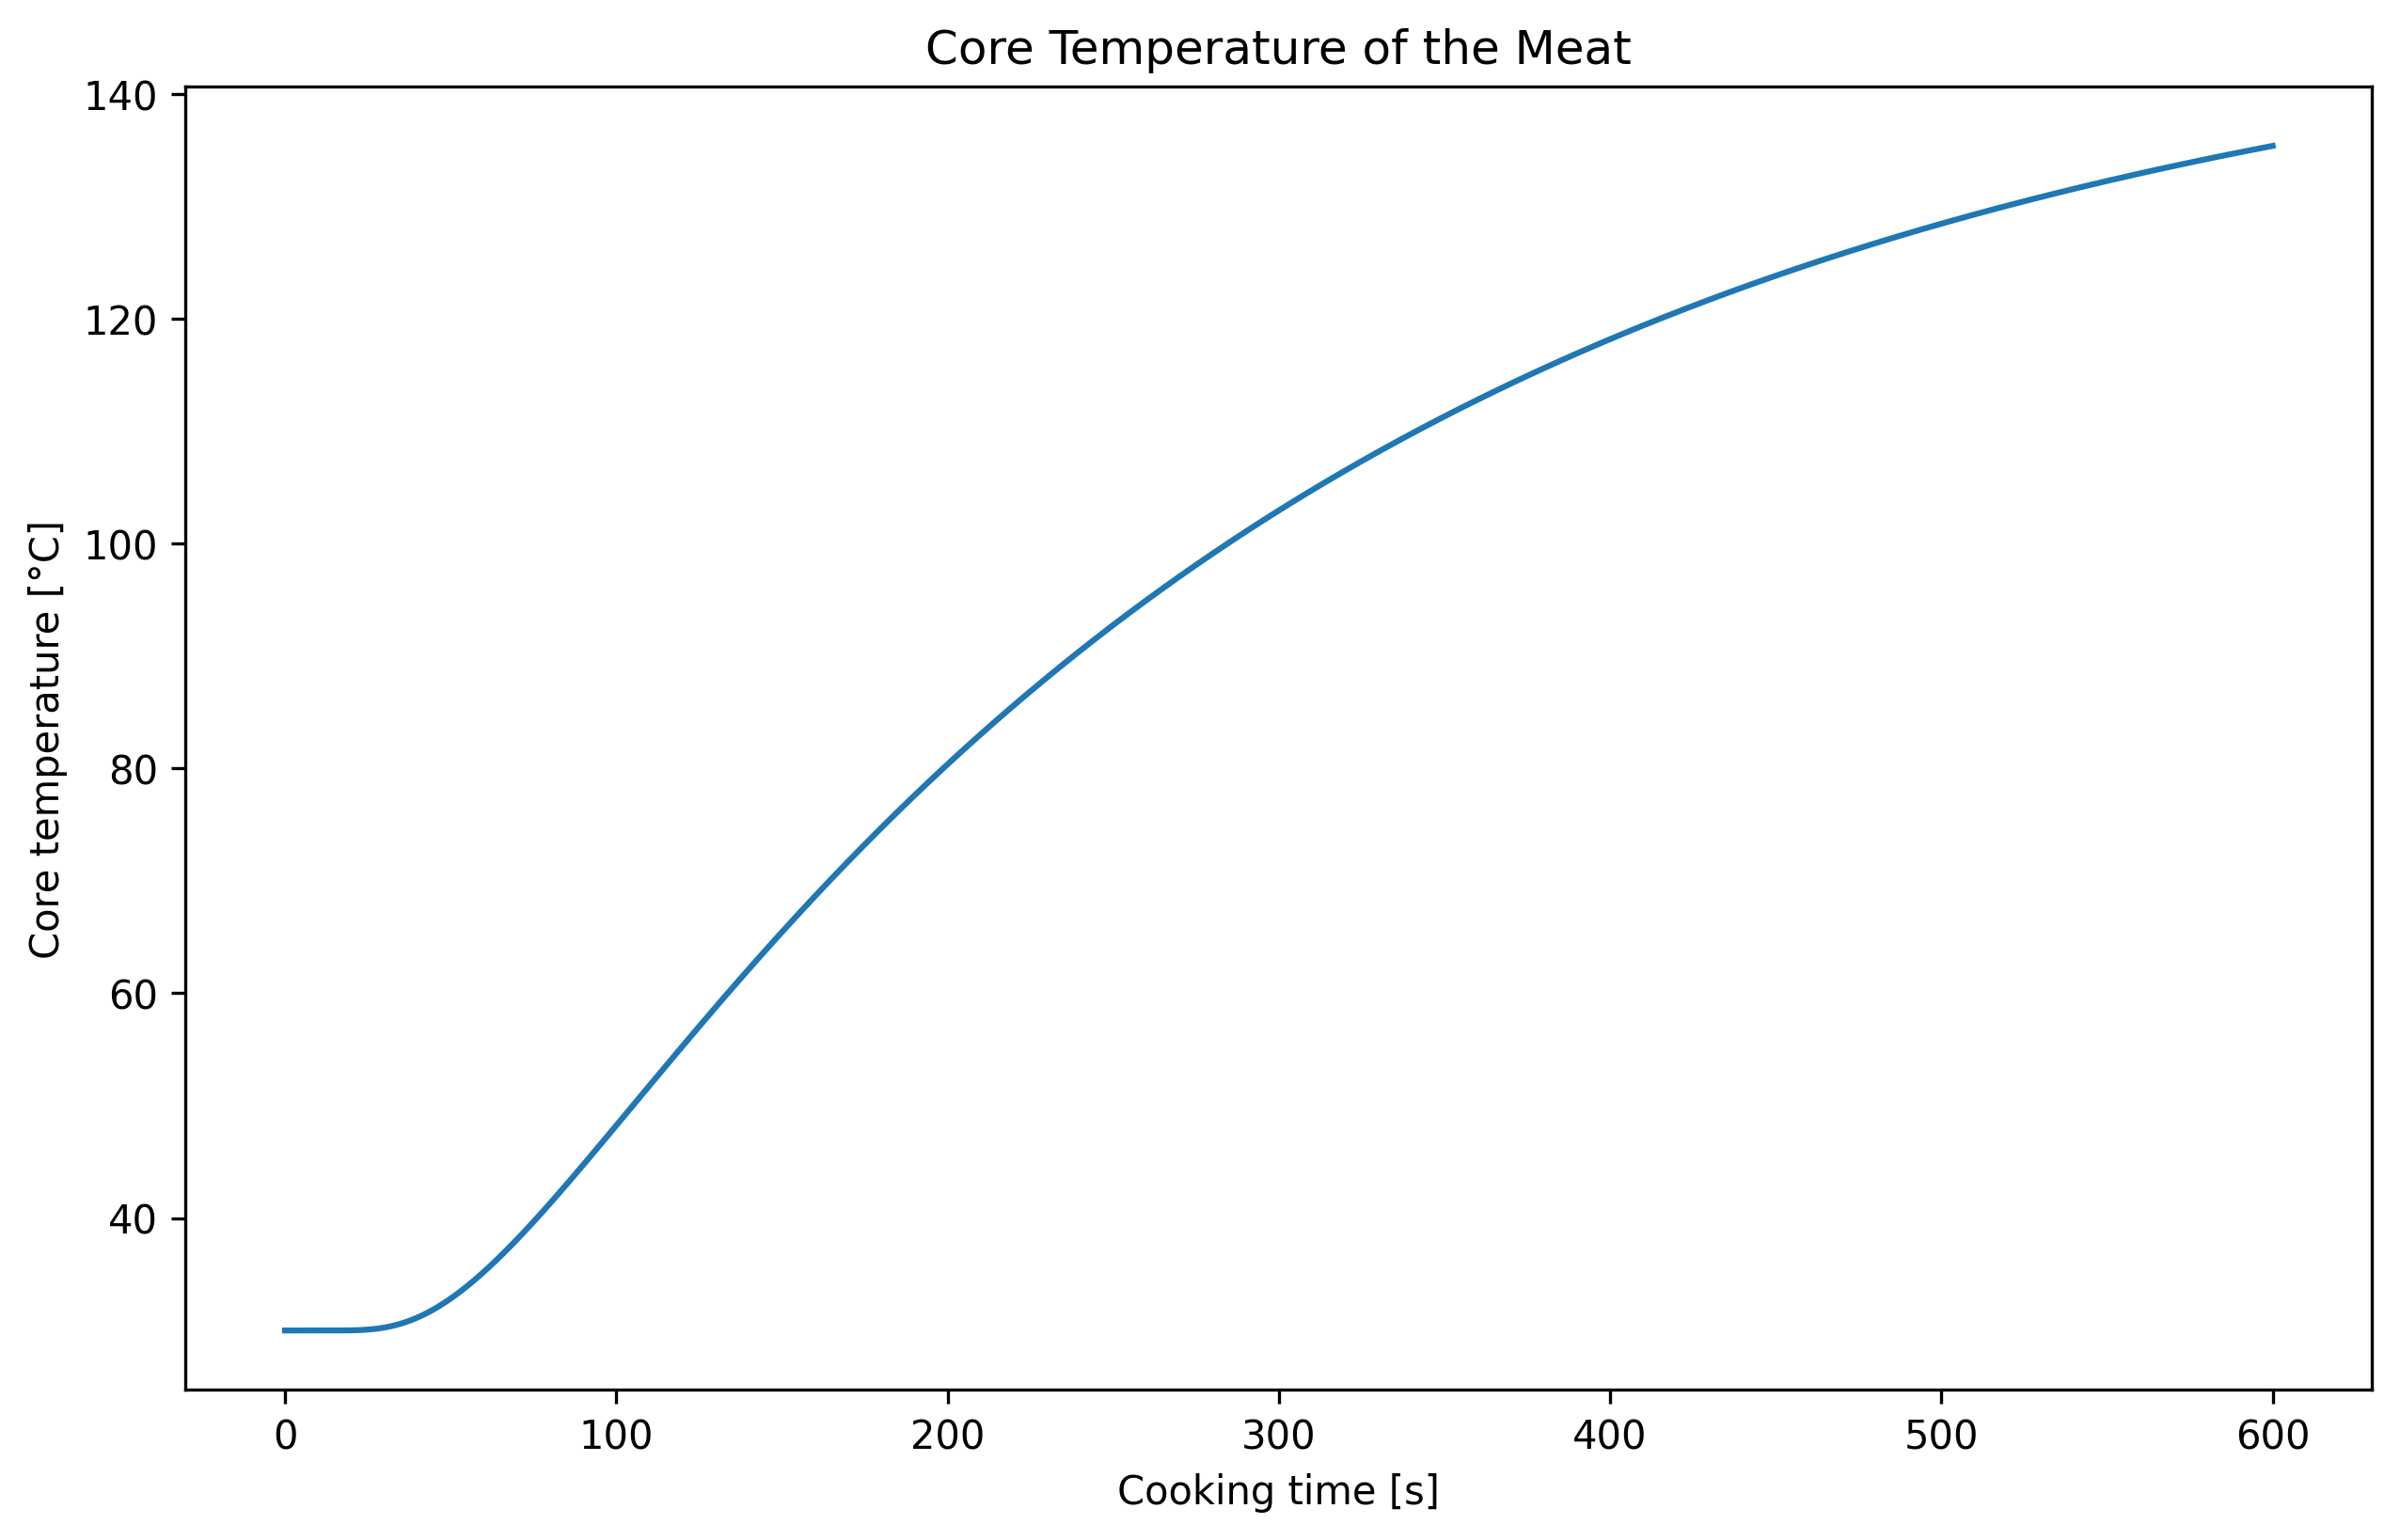

The core temperature of the meat after cooking is: 135.38 °C


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 물성치 및 경계조건 설정
T_plate = 100.0  # 하부 판 온도 [°C]
T_heatelem = 600.0  # 오븐 상부 히팅 파이프 온도 [°C]
T_air = 180.0  # 오븐 내 순환하는 공기 온도 [°C]
T_init = 30.0  # 초기 온도 [°C]
rho = 1.0  # 고기 밀도 [g/cm^3]
C = 0.5  # 고기 비열 [J/g·K]
L = 5.0  # 고기 두께 [cm]
k = 0.005  # 고기 열전도 계수 [W/cm·K]
epsilon = 0.80  # 고기 방사 계수
h_oven = 0.03  # 공기 순환에 의한 대류 열전달 계수 [W/cm^2·K]
sigma = 5.67e-12  # 스테판-볼츠만 계수 [W/cm^2·K^4]

# 공간 및 시간 격자 설정
Nz = 101  # z 방향 격자 수
dz = L / (Nz - 1)  # z 방향 격자 크기 [cm]
t_final = 60*10  # 최종 시간 [s]
dt = 0.1  # 시간 간격 [s]
Nt = int(t_final/dt)  # 시간 스텝 수

# 열확산 계수 계산
alpha = k / (rho * C)
# alpha = 0.01

# 격자 생성 및 초기조건 설정
z = np.linspace(0, L, Nz)
t = np.linspace(0, t_final, Nt)

#T = np.ones(Nz) * 30.0  # 초기 온도 [°C]
T = np.zeros([Nz, Nt])
T[:, 0] = T_init  # 초기 온도 [°C]

# 시간에 따른 반복 계산
for n in range(1,Nt):
    T_old = T[:,n-1]

    # 경계조건 적용
    T[0,n] = T_plate
    T[-1,n] = T_old[-1] + (dt / (rho * C * dz)) * (h_oven * (T_air - T_old[-1]) + sigma * epsilon * (T_heatelem**4 - T_old[-1]**4))

    # 내부 격자점에 대한 열전도 방정식 계산
    for i in range(1, Nz-1):
        T[i, n] = T_old[i] + alpha * (dt / dz**2) * (T_old[i+1] - 2*T_old[i] + T_old[i-1])

# 결과 플롯

plt.figure(figsize=(10, 6), dpi=300)
plt.contourf(t, z, T, cmap='Reds', levels=np.linspace(0, 200, 21))
plt.xlabel('Cooking time [s]')
plt.ylabel('Depth [cm]')
plt.colorbar(label='Temperature [°C]')
plt.title('Temperature Distribution in Meat')
plt.show()

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t, T[Nz//2,:])
plt.xlabel('Cooking time [s]')
plt.ylabel('Core temperature [°C]')
plt.title('Core Temperature of the Meat')
plt.show()

print(f"The core temperature of the meat after cooking is: {T[Nz//2,-1]:.2f} °C")